In [40]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import matplotlib.pyplot as plt

In [41]:
# Load training data
train = pd.read_csv('data/cleaned_data_train.csv')
test = pd.read_csv('data/cleaned_data_test.csv')

train = train.drop(columns=['Sample'])
test = test.drop(columns=['Sample'])

X_train = train.drop(columns=['Cancer'])
y_train = train['Cancer']

X_test = test.drop(columns=['Cancer'])
y_test = test['Cancer']

print(X_train.shape)
print(X_test.shape)

# Check the distribution of the target variable
print(y_train.value_counts())
print(y_test.value_counts())


(228, 57736)
(57, 57736)
Cancer
True     180
False     48
Name: count, dtype: int64
Cancer
True     50
False     7
Name: count, dtype: int64


In [45]:
# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Check the shape of X_train to get the correct input dimension
input_dim = X_train.shape[1]

# Define the model
model = Sequential()

# Input layer with L2 regularization
# model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(input_dim,)))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(input_dim,)))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a slightly higher learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Summary of the model
model.summary()

/Users/liuruichen/Developer/2024/CS506/CS506_Final_Project/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 16)             │       923,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,809 (3.52 MB)

 Trainable params: 923,809 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.5194 - loss: 0.8019 - val_accuracy: 0.5217 - val_loss: 0.7142
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6800 - loss: 0.6555 - val_accuracy: 0.5870 - val_loss: 0.7133
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7689 - loss: 0.5710 - val_accuracy: 0.5435 - val_loss: 0.7181
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8190 - loss: 0.5061 - val_accuracy: 0.5652 - val_loss: 0.7235
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8392 - loss: 0.4537 - val_accuracy: 0.5870 - val_loss: 0.7270
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8840 - loss: 0.4095 - val_accuracy: 0.5870 - val_loss: 0.7295
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8949 - loss: 0.3710 - val_accuracy: 0.5870 - val_loss: 0.7282
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9206 - loss: 0.3375 - val_accuracy: 0.5870 - val_loss: 0.7

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
F1 score: 0.7209302325581395


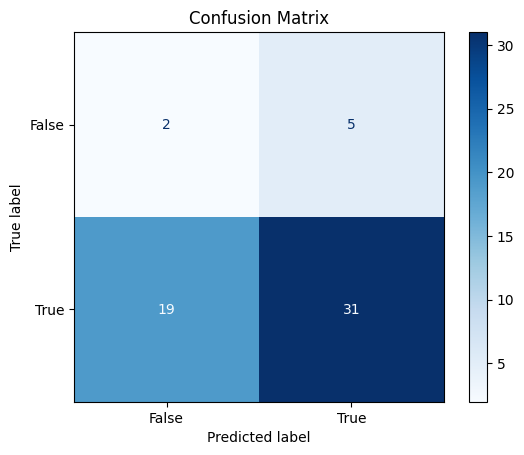

In [47]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate f1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# **Interpretation of Results**

The neural network performs much poorer than linear and logistic regression, it just overfits the data, and predict everything as 1. Neural network might be too complex for the data set with a clear correlation between the features(FPKM value of each gene) and the target variable(Cancer or not).

For the neural network itself, I tried some smaller ones and some bigger ones with more layers and nodes, but the results are all similar. My machine cannot handle more nodes, so I cannot try a very big neural network. But I think the neural network is not suitable for this data set.